# Ensemble Technique Assignment

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import tkinter as tk
from tkinter import ttk
import re

In [2]:
df_churn = pd.read_csv('TelcomCustomer-Churn.csv')
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_churn.shape

(7043, 21)

In [4]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df_churn.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [6]:
df_churn = df_churn.replace({'Yes':1,'No':0,'Female':1,'Male':0,'No internet service':0})
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [7]:
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')

In [8]:
for feature in df_churn.columns: # Loop through all columns in the dataframe
    if df_churn[feature].dtype == 'object': # Only apply for columns with categorical strings
        df_churn[feature] = pd.Categorical(df_churn[feature])# Replace strings with an integer
df_churn.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU
gender,1,0,0,0,1,1,0,1,1,0
SeniorCitizen,0,0,0,0,0,0,0,0,0,0
Partner,1,0,0,0,0,0,0,0,1,0
Dependents,0,0,0,0,0,0,1,0,0,1
tenure,1,34,2,45,2,8,22,10,28,62
PhoneService,0,1,1,0,1,1,1,0,1,1
MultipleLines,No phone service,0,0,No phone service,0,1,1,No phone service,1,0
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL
OnlineSecurity,0,1,1,1,0,0,0,1,0,1


In [9]:
df_churn['InternetService'].unique()

['DSL', 'Fiber optic', 0]
Categories (3, object): ['DSL', 'Fiber optic', 0]

In [10]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   int64   
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   int64   
 4   Dependents        7043 non-null   int64   
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   int64   
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   int64   
 10  OnlineBackup      7043 non-null   int64   
 11  DeviceProtection  7043 non-null   int64   
 12  TechSupport       7043 non-null   int64   
 13  StreamingTV       7043 non-null   int64   
 14  StreamingMovies   7043 non-null   int64   
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [11]:
df_churn.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [12]:
df_churn.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.017021,0.013773,0.002105,0.009212,0.008393,0.010487,0.011754,0.014569,-0.000048,0.008612
SeniorCitizen,0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.156530,0.220173,0.102411,0.150889
Partner,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,0.096848,0.319072,-0.150448
Dependents,-0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,-0.111377,-0.113890,0.064653,-0.164221
tenure,-0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.825880,-0.352229
PhoneService,0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.247398,0.113008,0.011942
OnlineSecurity,0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,-0.003636,0.296594,0.412619,-0.171226
OnlineBackup,0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.126735,0.441780,0.510100,-0.082255
DeviceProtection,0.002105,0.059428,0.153786,0.013963,0.360653,-0.071227,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.103797,0.482692,0.522881,-0.066160
TechSupport,0.009212,-0.060625,0.119999,0.063268,0.324221,-0.096340,0.354931,0.294233,0.333313,1.000000,0.278070,0.279358,0.037880,0.338304,0.432868,-0.164674


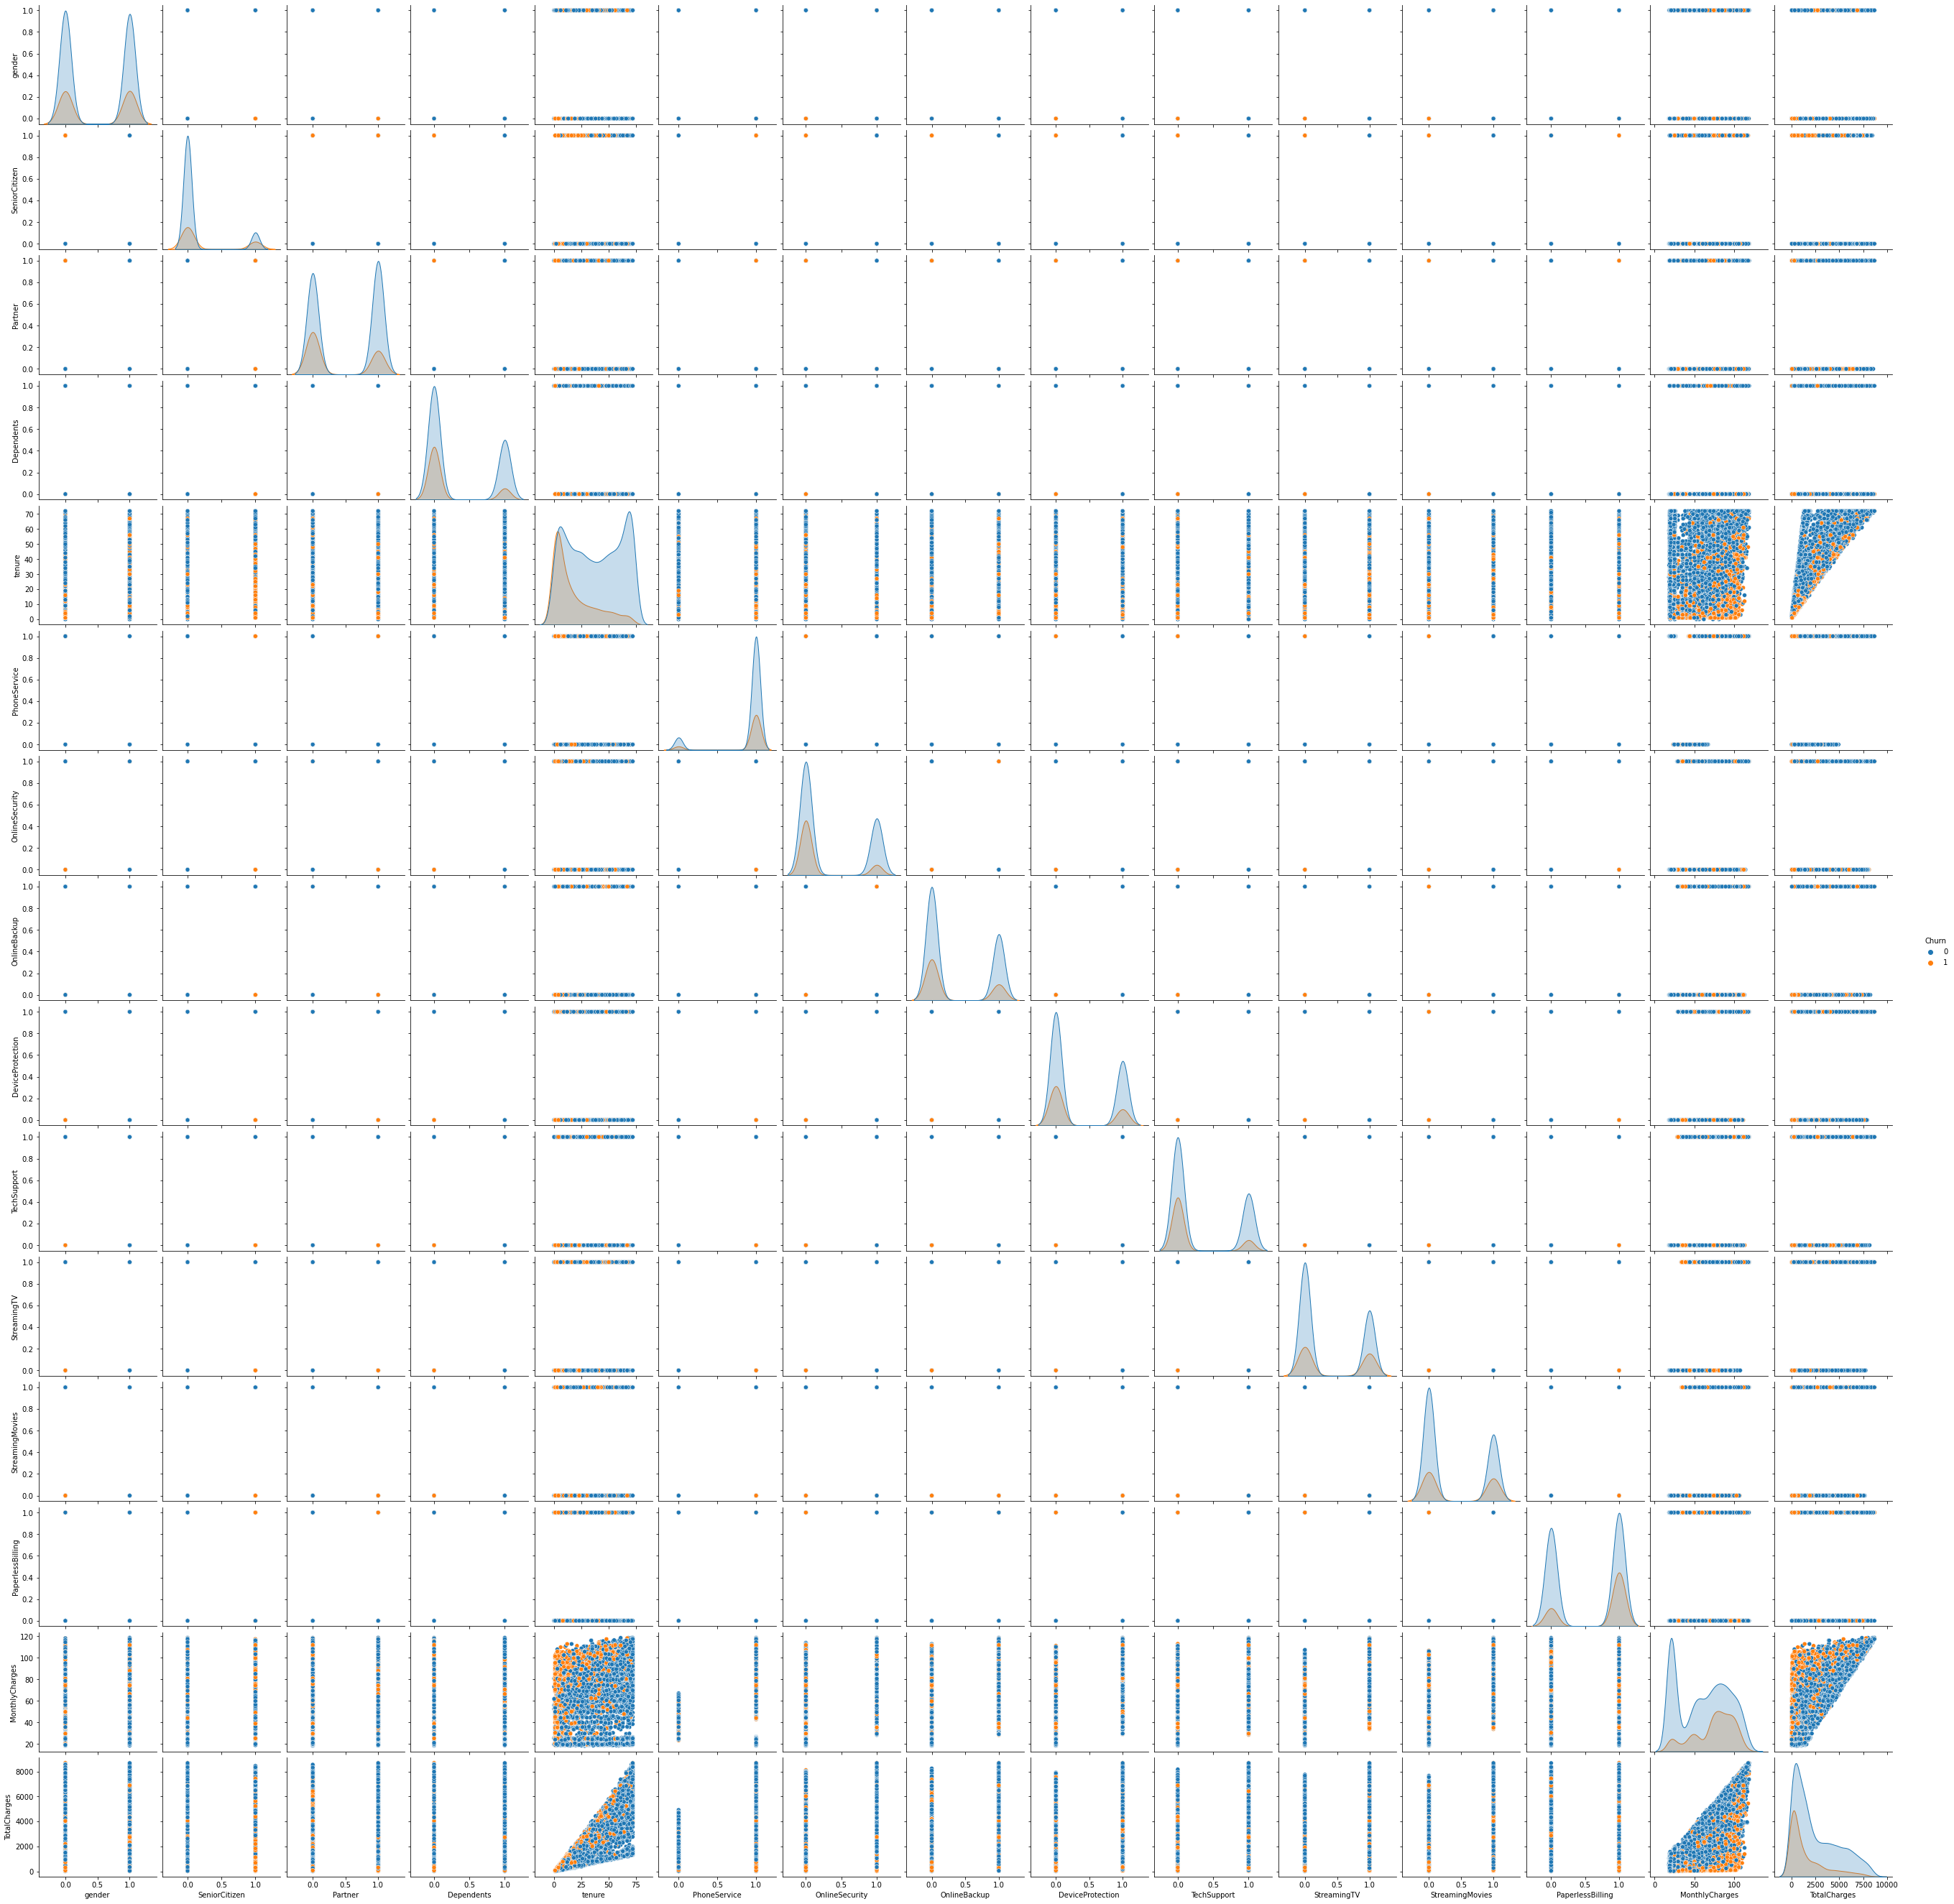

In [13]:
sns.pairplot(df_churn,hue="Churn");

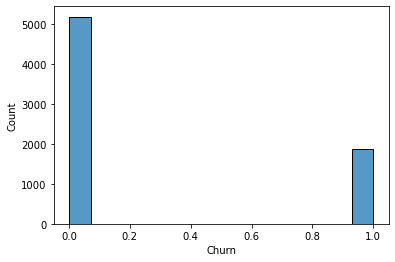

In [14]:
sns.histplot(df_churn['Churn']);

In [15]:
oneHotCols=["MultipleLines","InternetService","Contract","PaymentMethod"]
df_churn=pd.get_dummies(df_churn, columns=oneHotCols)
df_churn.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU
gender,1,0,0,0,1,1,0,1,1,0
SeniorCitizen,0,0,0,0,0,0,0,0,0,0
Partner,1,0,0,0,0,0,0,0,1,0
Dependents,0,0,0,0,0,0,1,0,0,1
tenure,1,34,2,45,2,8,22,10,28,62
PhoneService,0,1,1,0,1,1,1,0,1,1
OnlineSecurity,0,1,1,1,0,0,0,1,0,1
OnlineBackup,1,0,1,0,0,0,1,0,0,1
DeviceProtection,0,1,0,1,0,1,0,0,1,0


In [16]:
df_churn.shape

(7043, 30)

In [17]:
df_churn['OnlineSecurity'].unique()

array([0, 1], dtype=int64)

In [18]:
df_churn['OnlineBackup'].unique()

array([1, 0], dtype=int64)

In [19]:
df_churn['DeviceProtection'].unique()

array([0, 1], dtype=int64)

In [20]:
df_churn['TechSupport'].unique()

array([0, 1], dtype=int64)

In [21]:
df_churn['TotalCharges'] = df_churn['TotalCharges'].fillna(df_churn['TotalCharges'].median())

In [22]:
X = df_churn.drop(["customerID","Churn"],axis=1)
y = df_churn['Churn']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [24]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [25]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9979716024340771
0.7245622337908187


In [26]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.788235294117647
0.7979176526265973


In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 5925 to 5157
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   4930 non-null   int64  
 1   SeniorCitizen                            4930 non-null   int64  
 2   Partner                                  4930 non-null   int64  
 3   Dependents                               4930 non-null   int64  
 4   tenure                                   4930 non-null   int64  
 5   PhoneService                             4930 non-null   int64  
 6   OnlineSecurity                           4930 non-null   int64  
 7   OnlineBackup                             4930 non-null   int64  
 8   DeviceProtection                         4930 non-null   int64  
 9   TechSupport                              4930 non-null   int64  
 10  StreamingTV                              4930

In [28]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                              Imp
gender                                   0.000000
SeniorCitizen                            0.000000
Partner                                  0.000000
Dependents                               0.000000
tenure                                   0.080834
PhoneService                             0.000000
OnlineSecurity                           0.000000
OnlineBackup                             0.000000
DeviceProtection                         0.000000
TechSupport                              0.000000
StreamingTV                              0.000000
StreamingMovies                          0.000000
PaperlessBilling                         0.000000
MonthlyCharges                           0.022437
TotalCharges                             0.123132
MultipleLines_0                          0.000000
MultipleLines_1                          0.000000
MultipleLines_No phone service           0.000000
InternetService_0                        0.000000


0.7979176526265973


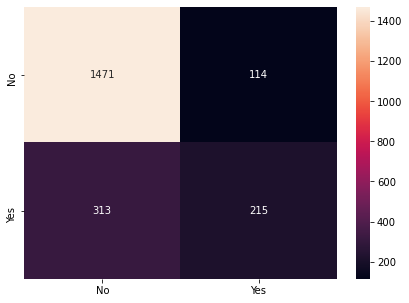

In [29]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

## Ensemble Learning - Bagging

In [30]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.7927117841930904


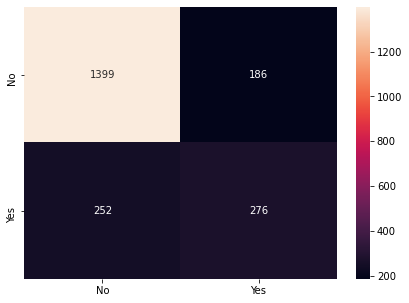

In [31]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [32]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.7927117841930904


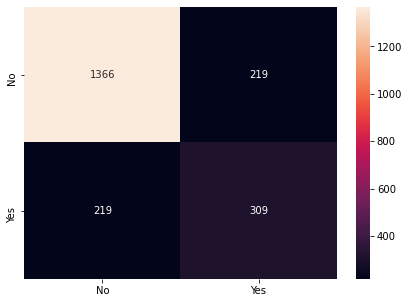

In [33]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.8017037387600567


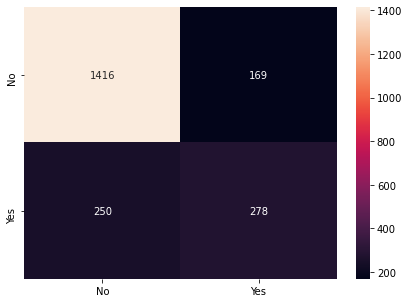

In [35]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5,max_features=6)
rfcl = rfcl.fit(X_train, y_train)
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))

0.8111689540937056


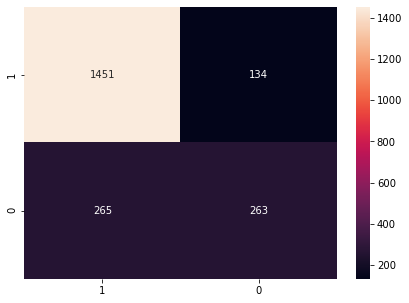

In [37]:
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in [1,0]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [38]:
print(pd.DataFrame.from_dict({'Model':["Decision Tree","Bagging","AdaBoost","Gradient Boost","Random Forest"],'Accuracy':[dTreeR.score(X_test , y_test),bgcl.score(X_test , y_test),abcl.score(X_test , y_test),gbcl.score(X_test, y_test),rfcl.score(X_test, y_test)]}))

            Model  Accuracy
0   Decision Tree  0.797918
1         Bagging  0.792712
2        AdaBoost  0.792712
3  Gradient Boost  0.801704
4   Random Forest  0.811169


Random Forests model gives best accuracy as compared to other models. Hence this model will be pickled.

In [39]:
import pickle
with open("classifier.pkl","wb") as pickle_out:
    pickle.dump(rfcl, pickle_out)

In [40]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   customerID                               7043 non-null   category
 1   gender                                   7043 non-null   int64   
 2   SeniorCitizen                            7043 non-null   int64   
 3   Partner                                  7043 non-null   int64   
 4   Dependents                               7043 non-null   int64   
 5   tenure                                   7043 non-null   int64   
 6   PhoneService                             7043 non-null   int64   
 7   OnlineSecurity                           7043 non-null   int64   
 8   OnlineBackup                             7043 non-null   int64   
 9   DeviceProtection                         7043 non-null   int64   
 10  TechSupport                         

In [41]:
#!/usr/bin/python3
from tkinter import *
from PIL import ImageTk,Image

win = tk.Tk()
win.title('GUI')
win.geometry("700x700")

gender = ttk.Label(win,width=20,text="Gender")
gender.grid(row=0,column=0,sticky=tk.W)

gender_sel = tk.StringVar()
genderopt = OptionMenu(win,gender_sel,"Male","Female")
genderopt.grid(row=0,column=1)
###################################################################
SeniorCitizen = ttk.Label(win,width=20,text="Senior Citizen")
SeniorCitizen.grid(row=1,column=0,sticky=tk.W)

SeniorCitizen_sel = tk.IntVar()
SeniorCitizenopt = OptionMenu(win,SeniorCitizen_sel,1,0)
SeniorCitizenopt.grid(row=1,column=1)
####################################################################
Partner = ttk.Label(win,width=20,text="Partner")
Partner.grid(row=2,column=0,sticky=tk.W)

Partner_sel = tk.StringVar()
Partneropt = OptionMenu(win,Partner_sel,"Yes","No")
Partneropt.grid(row=2,column=1)
###################################################################
Dependents = ttk.Label(win,width=20,text="Dependents")
Dependents.grid(row=3,column=0,sticky=tk.W)

Dependents_sel = tk.StringVar()
Dependentsopt = OptionMenu(win,Dependents_sel,"Yes","No")
Dependentsopt.grid(row=3,column=1)
#################################################################
Tenure = ttk.Label(win,width=20,text="Tenure")
Tenure.grid(row=4,column=0,sticky=tk.W)

Tenure_sel = tk.StringVar()
Tenure_EntryBox = ttk.Entry(win,width=16,textvariable=Tenure_sel)
Tenure_EntryBox.grid(row=4,column=1)
##################################################################
PhoneService = ttk.Label(win,width=20,text="Phone Service")
PhoneService.grid(row=5,column=0,sticky=tk.W)

PhoneService_sel = tk.StringVar()
PhoneServiceopt = OptionMenu(win,PhoneService_sel,"Yes","No")
PhoneServiceopt.grid(row=5,column=1)
##################################################################
MultipleLines = ttk.Label(win,width=20,text="Multiple Lines")
MultipleLines.grid(row=6,column=0,sticky=tk.W)

MultipleLines_sel = tk.StringVar()
MultipleLinesopt = OptionMenu(win,MultipleLines_sel,"Yes","No","No phone service")
MultipleLinesopt.grid(row=6,column=1)
##################################################################
InternetService = ttk.Label(win,width=20,text="Internet Service")
InternetService.grid(row=7,column=0,sticky=tk.W)

InternetService_sel = tk.StringVar()
InternetServiceopt = OptionMenu(win,InternetService_sel,"0","DSL","Fiber optic")
InternetServiceopt.grid(row=7,column=1)
##################################################################
OnlineSecurity = ttk.Label(win,width=20,text="Online Security ")
OnlineSecurity.grid(row=8,column=0,sticky=tk.W)

OnlineSecurity_sel = tk.StringVar()
OnlineSecurityopt = OptionMenu(win,OnlineSecurity_sel,"Yes","No")
OnlineSecurityopt.grid(row=8,column=1)
####################################################################
OnlineBackup = ttk.Label(win,width=20,text="Online Backup")
OnlineBackup.grid(row=9,column=0,sticky=tk.W)

OnlineBackup_sel = tk.StringVar()
OnlineBackupopt = OptionMenu(win,OnlineBackup_sel,"Yes","No")
OnlineBackupopt.grid(row=9,column=1)
####################################################################
DeviceProtection = ttk.Label(win,width=20,text="Device Protection ")
DeviceProtection.grid(row=10,column=0,sticky=tk.W)

DeviceProtection_sel = tk.StringVar()
DeviceProtectionopt = OptionMenu(win,DeviceProtection_sel,"Yes","No")
DeviceProtectionopt.grid(row=10,column=1)
#####################################################################
TechSupport = ttk.Label(win,width=20,text="Tech Support")
TechSupport.grid(row=11,column=0,sticky=tk.W)

TechSupport_sel = tk.StringVar()
TechSupportopt = OptionMenu(win,TechSupport_sel,"Yes","No")
TechSupportopt.grid(row=11,column=1)
#####################################################################
StreamingTV = ttk.Label(win,width=20,text="Streaming TV ")
StreamingTV.grid(row=12,column=0,sticky=tk.W)

StreamingTV_sel = tk.StringVar()
StreamingTVopt = OptionMenu(win,StreamingTV_sel,"Yes","No")
StreamingTVopt.grid(row=12,column=1)
#####################################################################
StreamingMovies = ttk.Label(win,width=20,text="Streaming Movies")
StreamingMovies.grid(row=13,column=0,sticky=tk.W)

StreamingMovies_sel = tk.StringVar()
StreamingMoviesopt = OptionMenu(win,StreamingMovies_sel,"Yes","No")
StreamingMoviesopt.grid(row=13,column=1)
#####################################################################
Contract = ttk.Label(win,width=20,text="Contract")
Contract.grid(row=14,column=0,sticky=tk.W)

Contract_sel = tk.StringVar()
Contractopt = OptionMenu(win,Contract_sel,"Month-to-month","One year","Two year")
Contractopt.grid(row=14,column=1)
#####################################################################
PaperlessBilling = ttk.Label(win,width=20,text="Paperless Billing ")
PaperlessBilling.grid(row=15,column=0,sticky=tk.W)

PaperlessBilling_sel = tk.StringVar()
PaperlessBillingopt = OptionMenu(win,PaperlessBilling_sel,"Yes","No")
PaperlessBillingopt.grid(row=15,column=1)
#####################################################################
PaymentMethod = ttk.Label(win,width=20,text="Payment Method")
PaymentMethod.grid(row=16,column=0,sticky=tk.W)

PaymentMethod_sel = tk.StringVar()
PaymentMethodopt = OptionMenu(win,PaymentMethod_sel,"Bank transfer (automatic)","Credit card (automatic)","Electronic check","Mailed check")
PaymentMethodopt.grid(row=16,column=1)
#####################################################################
MonthlyCharges = ttk.Label(win,width=20,text="Monthly Charges")
MonthlyCharges.grid(row=17,column=0,sticky=tk.W)

MonthlyCharges_sel = tk.StringVar()
MonthlyCharges_EntryBox = ttk.Entry(win,width=16,textvariable=MonthlyCharges_sel)
MonthlyCharges_EntryBox.grid(row=17,column=1)
#######################################################################
TotalCharges = ttk.Label(win,width=20,text="Total Charges")
TotalCharges.grid(row=18,column=0,sticky=tk.W)

TotalCharges_sel = tk.StringVar()
TotalCharges_EntryBox = ttk.Entry(win,width=16,textvariable=TotalCharges_sel)
TotalCharges_EntryBox.grid(row=18,column=1)

def submit_button():
    global df_new
    df_new = pd.DataFrame.from_dict({'gender':[gender_sel.get()],'SeniorCitizen':[SeniorCitizen_sel.get()],'Partner':[Partner_sel.get()],'Dependents':[Dependents_sel.get()],'Tenure':[Tenure_sel.get()],'PhoneService':[PhoneService_sel.get()],'MultipleLines':[MultipleLines_sel.get()],'InternetService':[InternetService_sel.get()],'OnlineSecurity':[OnlineSecurity_sel.get()],'OnlineBackup':[OnlineBackup_sel.get()],'DeviceProtection':[DeviceProtection_sel.get()],'TechSupport':[TechSupport_sel.get()],'StreamingTV':[StreamingTV_sel.get()],'StreamingMovies':[StreamingMovies_sel.get()],'Contract':[Contract_sel.get()],'PaperlessBilling':[PaperlessBilling_sel.get()],'PaymentMethod':[PaymentMethod_sel.get()],'MonthlyCharges':[MonthlyCharges_sel.get()],'TotalCharges':[TotalCharges_sel.get()]})
    confirm ="Done"
    Confirm_Entrybox = ttk.Entry(win,width=16)
    Confirm_Entrybox.grid(row=19,column=2)
    Confirm_Entrybox.insert(1,str(confirm))
    df_new = df_new.replace({'Yes':1,'No':0,'Female':1,'Male':0,'No internet service':0})
    cal_cols = ['MonthlyCharges','TotalCharges']
    df_new['Tenure'] = pd.to_numeric(df_new['Tenure'], errors='coerce')
    for field in cal_cols:
        df_new[field] = df_new[field].astype(float)
    for feature in df_new.columns: # Loop through all columns in the dataframe
        if df_new[feature].dtype == 'object': # Only apply for columns with categorical strings
            df_new[feature] = pd.Categorical(df_new[feature])
    ##One Hot Encoding###################################
    MultipleLinesopt=['0','1','No phone service']
    for field in MultipleLinesopt:
        if field == df_new['MultipleLines'].values[0].astype(str):
            df_new['MultipleLines_'+field] = int(1)
        else:
            df_new['MultipleLines_'+field] = int(0)
    df_new = df_new.drop('MultipleLines',axis=1)
    ##########################################################
    InternetServiceopt=['0','DSL','Fiber optic']
    for field in InternetServiceopt:
        if field == df_new['InternetService'].values[0]:
            df_new['InternetService_'+field] = int(1)
        else:
            df_new['InternetService_'+field] = int(0)
    df_new = df_new.drop('InternetService',axis=1)
    #########################################################
    Contractopt=['Month-to-month','One year','Two year']
    for field in Contractopt:
        if field == df_new['Contract'].values[0]:
            df_new['Contract_'+field] = int(1)
        else:
            df_new['Contract_'+field] = int(0)
    df_new = df_new.drop('Contract',axis=1)
    #########################################################
    PaymentMethodopt=['Bank transfer (automatic)','Credit card (automatic)','Electronic check','Mailed check']
    for field in PaymentMethodopt:
        if field == df_new['PaymentMethod'].values[0]:
            df_new['PaymentMethod_'+field] = int(1)
        else:
            df_new['PaymentMethod_'+field] = int(0)
    df_new = df_new.drop('PaymentMethod',axis=1)
    #########################################################
    
    
submit_button = ttk.Button(win,text="Submit",command=submit_button)
submit_button.grid(row=19,column=0)

def predict_button():
    with open("classifier.pkl","rb") as pickle_read:
        prediction = pickle.load(pickle_read)
        x = prediction.predict(df_new)
    if x[0] == 0:
        positive ="Yes"
        positive_Entrybox = ttk.Entry(win,width=16)
        positive_Entrybox.grid(row=20,column=2)
        positive_Entrybox.insert(1,str(positive))
    else:
        negative ="No"
        negative_Entrybox = ttk.Entry(win,width=16)
        negative_Entrybox.grid(row=20,column=2)
        negative_Entrybox.insert(1,str(negative))
        
predict_button = ttk.Button(win,text="Predict",command=predict_button)
predict_button.grid(row=20,column=0)

win.mainloop()

## Conclusion

Out of all models Random Forests algorithm gave higher accurate results than other models. GUI designed to use pickled model predictor has been successfully designed. While some of data is indeterminate or null in other formats future data must have definite values in order to improve model accuracy. High velocity, high veracity, high value of data will ensure better training of models but high volume of data with imbalanced outputs might introduce bias into the model. We should also ensure which of the qualities customers liked about the service which can be then rated and data can be collected to ensure high quality of products thus attracting new customers and retaining maximum old customer for business profits. 